<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/Assignment4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

In driver_data.csvPreview the document, you are given a dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit.

- Run the K-Means algorithm on this dataset and find the optimal number of clusters. What insights can you gather from these clusters?
- Perform Agglomerative clustering on the same dataset with an appropriate number of clusters. Plot the dendrogram.
- Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. Which model is superior?
Document your work and explain your reasoning.

(Optional) Question 2: 
In comapany_stocks.csv, Preview the document, you are given the historical stock price movement for 39 companies. This stock price movement is defined as the difference in dollar amount between the closing and opening prices for each trading day. The data was originally collected from Yahoo Finance for 2010 to 2015 duration. Each column represents a trading day and each row represents a company. Refer to the header and index for details about the trading day and companies.

Apply any of the clustering methods that you have learned to partition companies into clusters. What insights can you gather from these clusters? Document your work and explain your reasoning.

As a preliminary understanding, we can expect drivers who drive different distances (short to long) and how dangerously they drive (speeding).

## Using K-Means

In [0]:
import pandas as pd 
driver_data = pd.read_csv("/content/drive/My Drive/UC Machine Learning/Datasets/driver_data.csv") 

In [2]:
driver_data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [3]:
driver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance_Feature  4000 non-null   float64
 1   Speeding_Feature  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [4]:
driver_data.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


So we are dealing with 4000 different drivers, and we have both the distance and speed metrics to all of them.

- No missing values. 
- Maximum distance is 244 miles and min is 15 miles with an average distance of 76 miles which means that distance feature is positive skewed. 
- Maximum speech is 100 mph with a minimum speed of 0 (which is strange) and average speed of 10 mph.

In [5]:
#we will first scale the dataset as both the features are in different ranges
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(driver_data)

driver_data_scaled = std_scale.transform(driver_data)

driver_data_scaled[:7,]

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       [-0.38066642,  0.8228745 ],
       [-0.40142849,  1.04174351],
       [-0.63841535, -0.05260152],
       [-0.32548795,  0.67696183]])

In [0]:
from sklearn.cluster import KMeans

ssq = []

for K in range(1,14):
    kmeans_model = KMeans(n_clusters=K, random_state=149)
    kmeans_model.fit(driver_data_scaled)
    ssq.append(kmeans_model.inertia_)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

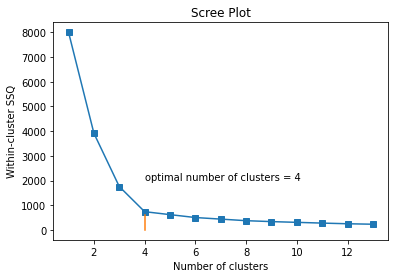

In [8]:
plt.plot(range(1,14), ssq, marker='s')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([4]*600, range(1,601), "-")
plt.text(4, 2000, "optimal number of clusters = 4")
plt.show()

In [9]:
km = KMeans(n_clusters=4, random_state=911)

km.fit(driver_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=911, tol=0.0001, verbose=0)

In [0]:
predicted_cluster = km.predict(driver_data_scaled)

In [11]:
predicted_cluster[:7]

array([3, 3, 3, 3, 3, 0, 3], dtype=int32)

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(driver_data_scaled, predicted_cluster)

0.7843727073779272

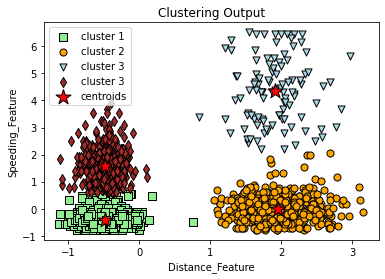

In [14]:
plt.scatter(driver_data_scaled[predicted_cluster==0,0], driver_data_scaled[predicted_cluster==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(driver_data_scaled[predicted_cluster==1,0], driver_data_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(driver_data_scaled[predicted_cluster==2,0], driver_data_scaled[predicted_cluster==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(driver_data_scaled[predicted_cluster==3,0], driver_data_scaled[predicted_cluster==3, 1], s=50, c='brown',\
           marker='d', edgecolors='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

### Explaination on the result from K-Means method:

As we know, through K-Means method, we will decide the 'K' value and investigate if its true. We can check and confirm the value of K by calculating the 'silhouette_score' OR plotting the 'Scree Plot' OR 'plotting the graph between the features'.

For instance, here I have decided the K value to be '4' after looking at the scree plot. Lets give a closer look on each deciding factor.

### 1.Scree Plot:

Its a simple plot between SSQ (lowest sum-of-squares) and Range of K values/ number of clusters. Therefore, we are trying to understand how the "variance within the cluster" is changing while we are clustering differently. Since when we have the K value change from 4 to 5, we see the curve leveling out (going parallel to x-axis). This says, when we have clustered to 4, we start to see least variance within the cluster AND have least number of clusters.

### 2.Silhouette Score

Its a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

If its '-1' -> object has the least similarty within the cluster and maximum similarity to objects from other clusters

If its '+1' -> object has the highest similarty within the cluster and least similarty to objects from other clusters

Here, we have got a value of '0.7843' when K is 4.

### 3.Plotting the graph between the features

A simple graph between the features to explain how they vary within themselves. From the graph, it can be inferred that there are 4 densely populated regions. More importantly for each clusters, their centroids are well within the clusters and in center.

### 4. Insights from the Clusters

We can categorize drivers into 4 types based on their speed and distance profile. At one end, we have drivers who do short distance by exceeding speed limit quite often and a few rarely. And at the other end, we have drivers who do long distance by exceeding speed limit quite often and a few rarely.

Let's go by an assumption that all the drivers are travelling from point A to point B (or Vice-Versa) for only once (no multiple trips).

1.Orange: Drivers who drive less and cross the speed limit quite rarely: These might be the guys with low powered engines and carrying heavy loads. (OR) have terrible roads/ school zone/ low speed zone/ etc (OR) with a lot of pit-stops, etc. These drivers are considerably safe with respect to safety.

2.Red: Drivers who drive less and cross the speed limit quite often: These are the rash drivers who are more susceptible to crashes and needs special programs (from a safety point of view). These drivers might have high powered vehicles with less load (OR) really good roads and low density area (OR) race track, etc..

3.Green: Drivers who drive long and rarely cross the speed limit: These are especially small sized vehicles doing interstate/ long distances (OR) disciplined drivers (OR) Single way lane/ ghat roads (up hill) (OR) taking a lot of pitstops (OR) halting or idling at one place as the overall time travelled increases

4.Blue: Drivers who drive long and cross the speed limit quite often: These are dangerous drivers who needs a driver safety program. Might have over powered vehicle (OR) no halts/ pitstops (OR) really good roads (OR) downhill route, etc.

In general orange (for short distances) and green(for long distances) are prefereble drivers.

# Let's Explore further:

What happens to the results if we choose K as 3? Before running the code, lets think of how the results might alter.

So, essentially we are trying to cluster the entire objects in 3 groups. So there should be 3 centroids. Lets think of it like a square (when K =4) turning to triangle (K=3). The centroids of those clusters which have higher density/ distributed pattern will likely remain in the center and the ones with lower distribution might have centroid between and outside the densely populated groups.

With regards to the Silhouette Score, certainly the score will be closer to -1; i.e less than 0.784. That's because, the objects are poorly matched to its own cluster.


In [15]:
km = KMeans(n_clusters=3, random_state=149)

km.fit(driver_data_scaled)

predicted_cluster = km.predict(driver_data_scaled)

predicted_cluster[:7]

array([2, 0, 2, 0, 0, 0, 0], dtype=int32)

In [16]:
silhouette_score(driver_data_scaled, predicted_cluster)

0.7636008195603978

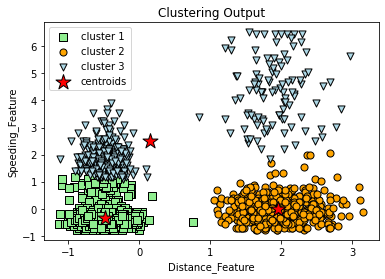

In [17]:
plt.scatter(driver_data_scaled[predicted_cluster==0,0], driver_data_scaled[predicted_cluster==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(driver_data_scaled[predicted_cluster==1,0], driver_data_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(driver_data_scaled[predicted_cluster==2,0], driver_data_scaled[predicted_cluster==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
#plt.scatter(driver_data_scaled[predicted_cluster==3,0], driver_data_scaled[predicted_cluster==3, 1], s=50, c='brown',\
#           marker='d', edgecolors='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

Therefore, we can see the silhouette_score decreasing and visualize centroid of orange cluster shifting slightly towards positive side of Distance_Feature axis, as predicted.

# Using Hierarchical clustering 

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
link = linkage(driver_data_scaled, method='ward', metric='euclidean')

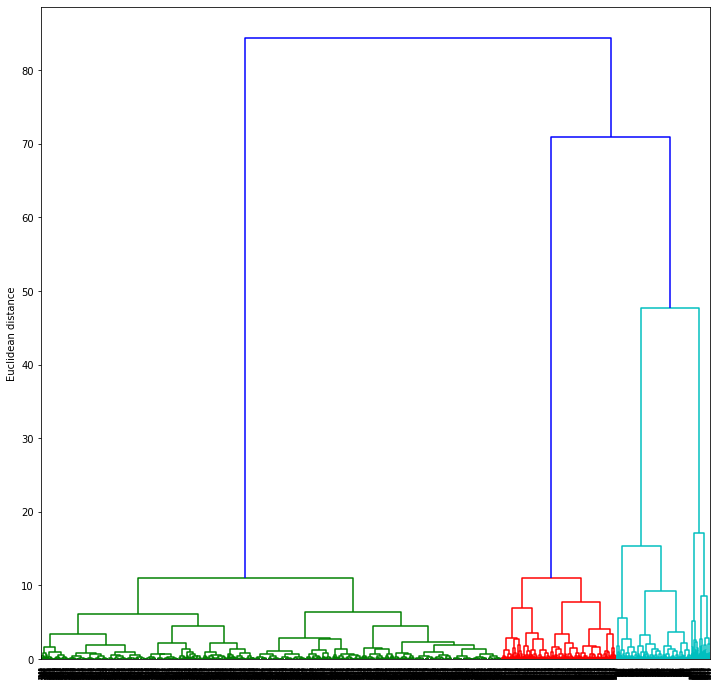

In [21]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

The dendrogram is a representation of straight-line distance between two objects in euclidean space. In most of the cases, the euclidean heights reflect the distance between the clusters. Therefore, looking at the tallest lines; i.e, the most distant groups are considered to be optimal clustering. Here we can draw the line where 4 such lines are cut.(Dendrogram is only accurate when data satisfies the ultrametric tree inequality, and this is unlikely for any real-world data.)

In [22]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

model.fit(driver_data_scaled)

model.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [23]:
silhouette_score(driver_data_scaled, model.labels_)

0.778897040913367

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


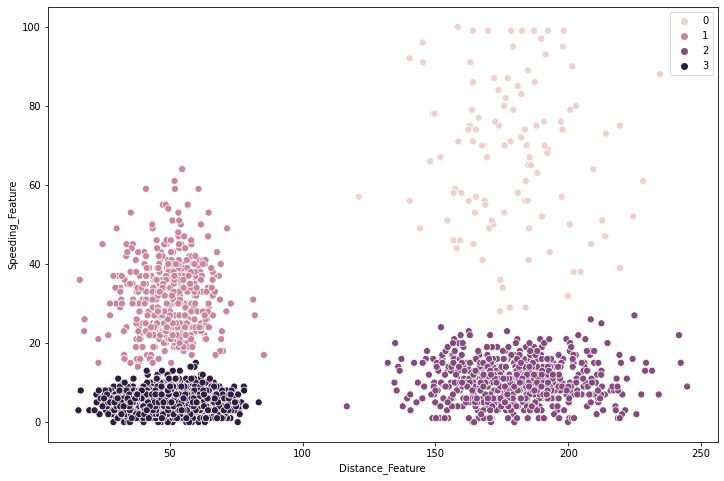

In [24]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=driver_data, hue=model.labels_, s=50)
plt.show()

Which is better? K-Means (OR) Hierarchical? 

Comparing the silhouette_score, it is observed K-Means has a better value at 0.7843 when compared with Hierarchical at 0.7788